<a href="https://colab.research.google.com/github/ShanBore/Advanced-A-B-Testing-for-Digital-Campaign-Success/blob/main/Campaign_Data_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install faker

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker and set the random seed for reproducibility
fake = Faker()
np.random.seed(42)

# Set parameters for synthetic data
num_recipients = 130000
campaign_channels = ['Email', 'Social Media', 'Paid Ads', 'SEO']
ages = np.random.normal(loc=30, scale=10, size=num_recipients)  # Skewed toward younger audience
ages = np.clip(ages, 18, 70).astype(int)  # Age range between 18 and 70

# Bias creation: Imbalance in campaign channels
channel_weights = [0.5, 0.3, 0.15, 0.05]
campaigns = np.random.choice(campaign_channels, size=num_recipients, p=channel_weights)

# Bias creation: Imbalance in gender distribution
genders = np.random.choice(['Male', 'Female'], size=num_recipients, p=[0.4, 0.6])

# Bias creation: Higher engagement for social media among younger audience
engagement_rate = []
click_through_rate = []

In [33]:
for age, channel in zip(ages, campaigns):
    # Basic engagement and CTR initialization
    base_engagement = np.random.uniform(0.05, 0.4)
    base_ctr = np.random.uniform(0.01, 0.2)

    # Apply bias based on age and channel
    if channel == 'Social Media' and age < 30:
        base_engagement += np.random.uniform(0.1, 0.2)
        base_ctr += np.random.uniform(0.05, 0.1)
    elif channel == 'Email' and age >= 40:
        base_engagement += np.random.uniform(0.05, 0.1)
        base_ctr += np.random.uniform(0.02, 0.05)

    # Add some randomness
    engagement_rate.append(np.clip(base_engagement + np.random.uniform(-0.05, 0.05), 0, 1))
    click_through_rate.append(np.clip(base_ctr + np.random.uniform(-0.02, 0.02), 0, 1))



In [35]:
# Generate columns
data = {
    'Recipient_ID': [fake.uuid4() for _ in range(num_recipients)],
    'Age': ages,
    'Gender': genders,
    'Campaign_Channel': campaigns,
    'Engagement_Rate': engagement_rate,
    'Click_Through_Rate': click_through_rate,
    'Region': np.random.choice(['North America', 'Europe', 'Asia', 'Australia'], size=num_recipients, p=[0.5, 0.2, 0.25, 0.05]),
    'Device_Type': np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_recipients, p=[0.7, 0.25, 0.05]),
    'Month': np.random.choice(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], size=num_recipients),
    'Campaign_Period': np.random.choice(['Morning', 'Afternoon', 'Evening'], size=num_recipients, p=[0.3, 0.5, 0.2]),
}

In [44]:
# Create DataFrame
df = pd.DataFrame(data)
# Save the data
df.to_csv('campaign_data.csv', index=False)

In [45]:
df.head()

,Recipient_ID,Age,Gender,Campaign_Channel,Engagement_Rate,Click_Through_Rate,Region,Device_Type,Month,Campaign_Period
0,2c89d194-f259-43c7-bfc6-25f8b83b270b,34,Male,Social Media,0.053627,0.195344,Asia,Mobile,September,Afternoon
1,ba7bcca6-295f-4ad6-a62f-216ea0dc0c3a,28,Female,Email,0.157106,0.003655,North America,Desktop,October,Evening
2,26ba2d22-2131-4c10-a355-36d90c27f2f1,36,Female,Social Media,0.265937,0.060457,Asia,Tablet,May,Morning
3,fc04f0a3-c26a-4002-ba81-b97b8417212a,45,Male,Paid Ads,0.341918,0.163760,North America,Desktop,April,Morning
4,e6454859-35b9-46a0-aaf7-93d54d1255e2,27,Female,Email,0.154525,0.036616,Asia,Desktop,November,Evening


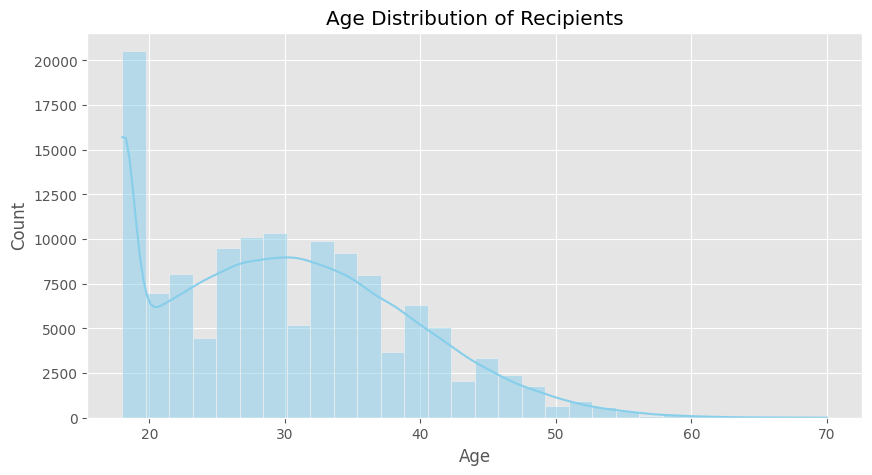

In [37]:
# Set up the plotting environment for EDA
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Recipients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-38-4d2d72ad5a0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Campaign_Channel', palette='viridis', order=df['Campaign_Channel'].value_counts().index)


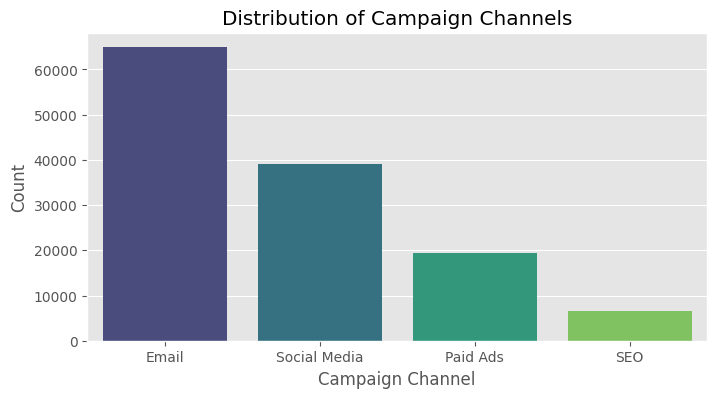

In [38]:
# 2. Campaign Channel Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Campaign_Channel', palette='viridis', order=df['Campaign_Channel'].value_counts().index)
plt.title('Distribution of Campaign Channels')
plt.xlabel('Campaign Channel')
plt.ylabel('Count')
plt.show()

<ipython-input-39-b68db2d97959>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Campaign_Channel', y='Engagement_Rate', palette='muted')


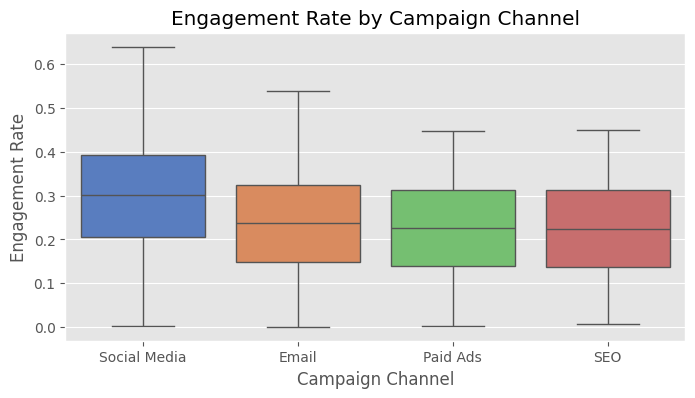

In [39]:
# 3. Engagement Rate by Campaign Channel
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Campaign_Channel', y='Engagement_Rate', palette='muted')
plt.title('Engagement Rate by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Engagement Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


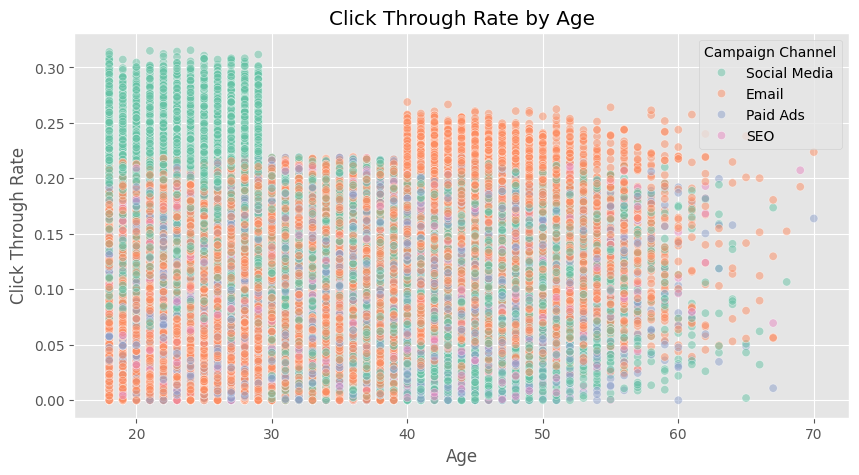

In [40]:
# 4. Click Through Rate by Age
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Click_Through_Rate', hue='Campaign_Channel', palette='Set2', alpha=0.5)
plt.title('Click Through Rate by Age')
plt.xlabel('Age')
plt.ylabel('Click Through Rate')
plt.legend(title='Campaign Channel')
plt.show()

<ipython-input-41-93271974109e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Device_Type', y='Engagement_Rate', palette='coolwarm')


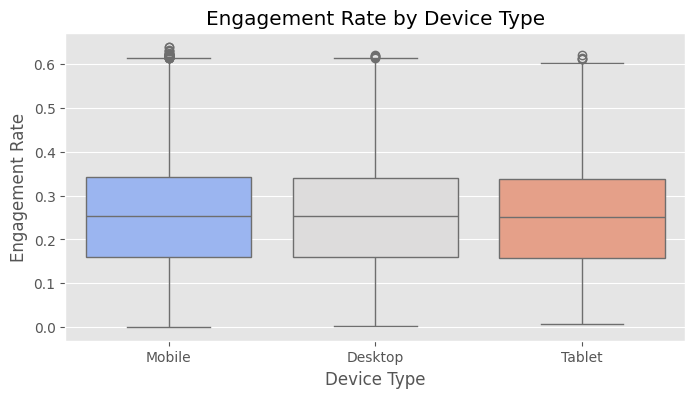

In [41]:
# 5. Engagement Rate by Device Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Device_Type', y='Engagement_Rate', palette='coolwarm')
plt.title('Engagement Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Engagement Rate')
plt.show()

<ipython-input-42-cb86806896df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region', palette='plasma', order=df['Region'].value_counts().index)


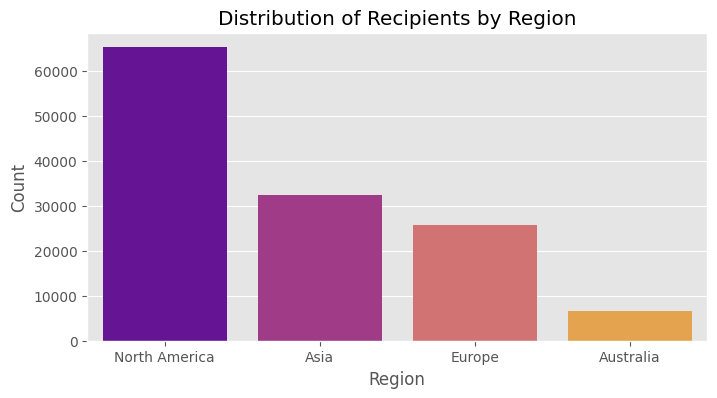

In [42]:
# 6. Distribution of Recipients by Region
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Region', palette='plasma', order=df['Region'].value_counts().index)
plt.title('Distribution of Recipients by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()